# ARCH Data Exploration

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BrockDSL/ARCH_Data_Explore/blob/main/arch_explore.ipynb)

### Includes and such

In [203]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)

import matplotlib.pyplot as plt
%matplotlib inline

/Users/tim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


### Option 1: Grab zip from GDocs (only need to do once) 

In [ ]:
!curl "https://drive.google.com/file/d/1BHePCdN6ySr4IYY9jq1S4QNjVWgvqyCS/view?usp=sharing" --output web-pages.csv.gz

### Option 2: Grab Zip from Arch (only need to do once)

In [ ]:
curl "https://webdata.archive-it.org/ait/arch:cohort.ribaric/research_services/download/ARCHIVEIT-13781/WebPagesExtraction/web-pages.csv.gz?access=72QSYZMS2SWP7CHSXTU3AXU4MXYDNCOQ" --output web-pages.csv.gz

### Data unpack (only need to do once)

In [4]:
!gunzip -k web-pages.csv.gz

rm: web-pages.csv: No such file or directory
web-pages.csv


In [3]:
web_text = pd.read_csv("web-pages.csv")

In [95]:
print("Data set length: ",len(web_text))

Data set length:  701794


In [92]:
#Changing crawl_data to date object
web_text['crawl_date']= pd.to_datetime(web_text['crawl_date'],format='%Y%m%d')

In [98]:
#rerun to get sample of 25 random entries
web_text.sample(25)

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
156316,2020-07-27,youtube.com,https://www.youtube.com/channel/UCpcdMFXD0QeTU...,text/html,text/html,en,About Press Copyright Contact us Creators Adve...
371590,2020-12-06,discover.brocku.ca,https://discover.brocku.ca/event-registration/...,text/html,text/html,en,Register for events – Discover Brock Universit...
386213,2020-12-11,mozilla.org,https://www.mozilla.org/cs/firefox/,text/html,text/html,cs,Firefox – buďte na internetu v bezpečí díky pr...
181284,2020-08-16,discover.brocku.ca,https://discover.brocku.ca/event-registration/...,text/html,text/html,en,Register for events – Discover Brock Universit...
387998,2020-12-11,schema.org,https://schema.org/EducationEvent,text/html,text/html,en,EducationEvent - Schema.org Type Schema.org Do...
466314,2021-02-13,discover.brocku.ca,https://discover.brocku.ca/event-registration/...,text/html,text/html,en,Register for events – Discover Brock Universit...
620006,2021-05-29,discover.brocku.ca,https://discover.brocku.ca/event-registration/...,text/html,text/html,en,Register for events – Discover Brock Universit...
390838,2020-12-20,discover.brocku.ca,https://discover.brocku.ca/event-registration/...,text/html,text/html,en,Register for events – Discover Brock Universit...
488094,2021-02-27,discover.brocku.ca,https://discover.brocku.ca/event-registration/...,text/html,text/html,en,Register for events – Discover Brock Universit...
321021,2020-10-31,niagaraanglican.ca,https://niagaraanglican.ca/news/covid-19-resou...,text/html,text/html,en,COVID-19 Resource Hub | News in the Diocese | ...


In [68]:

#All Domains written out to disk
#web_text['domain'].value_counts().to_csv("top_50.csv")

#Top 50 Domains to Screen
web_text['domain'].value_counts()[0:50]

discover.brocku.ca             195564
twitter.com                     55198
exhibits.library.brocku.ca      52711
gncc.ca                         43642
youtube.com                     41820
portcolborne.ca                 26403
wainfleet.ca                    18754
niagaraanglican.ca              17645
gobadgers.ca                    15953
stcatharinesstandard.ca         12762
niagarahealth.on.ca             10340
niagararegion.ca                 9907
notl.com                         9410
pelhamlibrary.on.ca              8980
accounts.google.com              7684
brocku.ca                        7061
thehopecentre.net                6759
pinterest.com                    6514
niagarafallsreview.ca            6504
niagarathisweek.com              5619
thorold.ca                       5588
tripadvisor.ca                   5460
m.youtube.com                    5023
niagaracollege.ca                4897
eventbrite.ca                    4801
cbc.ca                           4328
mozilla.org 

In [211]:
#Data points for domain
domain_mask = "portcolborne.ca"
domain_data = web_text[web_text["domain"] == domain_mask]
print("Total size:", len(domain_data))

Total size: 26403


In [213]:
#rows with language != en are not successful crawls, we can drop those
domain_data = domain_data[domain_data['language'] =='en']
print("Complete rows", len(domain_data))

Complete rows 24336


In [214]:
# displaying by date
domain_data.groupby(["crawl_date"]).count()

,domain,url,mime_type_web_server,mime_type_tika,language,content
crawl_date,,,,,,
2020-04-17,345,345,345,345,345,345
2020-04-24,86,86,86,86,86,86
2020-04-25,351,351,351,351,351,351
2020-05-04,635,635,635,635,635,635
2020-05-15,2,2,2,2,2,2
2020-05-16,153,153,153,153,153,153
2020-05-22,349,349,349,349,349,349
2020-05-23,303,303,303,303,303,303
2020-05-27,2,2,2,2,2,2


In [216]:
#displaying by url

#write out to disk
domain_data['url'].value_counts().to_csv("domain_by_urls.csv")

domain_data['url'].value_counts()

http://portcolborne.ca/page/covid-19                                                                             70
http://portcolborne.ca/page/news&nt=mediaRelease&iArticle=1364                                                   35
http://portcolborne.ca/page/news&nt=mediaRelease&iArticle=1436                                                   35
http://portcolborne.ca/page/news&nt=mediaRelease&iArticle=1445                                                   35
http://portcolborne.ca/page/news&nt=mediaRelease&iArticle=1321                                                   35
                                                                                                                 ..
http://portcolborne.ca/page/city_hall?sm=03&sy=2020&pgs=0&pgnor=0&pgnop=0                                        1 
https://www.portcolborne.ca/en/news/youth-aged-12-17-across-ontario-eligible-for-accelerated-second-dose.aspx    1 
https://www.portcolborne.ca/en/news/south-end-of-catharine-street-under-

In [224]:
url_mask = "http://portcolborne.ca/page/news&nt=mediaRelease&iArticle=1364"
url_data = domain_data[domain_data['url'] == url_mask]

for index, row in url_data.iterrows():
    url_data.at[index,'length'] = int(len(row['content']))



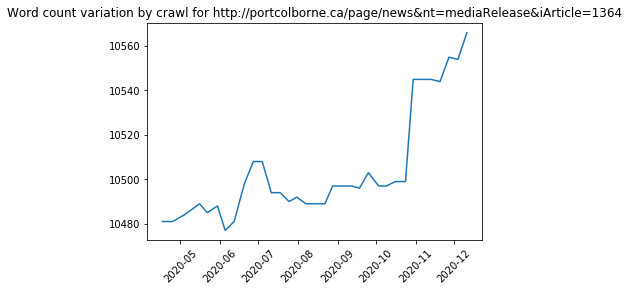

On internet archive:  https://web.archive.org/web/*/http://portcolborne.ca/page/news&nt=mediaRelease&iArticle=1364


In [226]:
plt.plot(url_data['crawl_date'],url_data['length'])
plt.xticks(rotation=45)
plt.title("Word count variation by crawl for " + url_mask)
plt.show()
print("On internet archive: ", "https://web.archive.org/web/*/"+url_mask)